### Khai báo bình thường:

In [1]:
import random
import math
import cv2
import numpy as np

# cạnh hình vuông
d = 20 
# bán kính hình tròn
R = 3
# số lần thử (số lần sinh mẫu điểm)
tries = 1000000
# số điểm nằm trong hình tròn
inside = 0
# tâm hình tròn
x = 5 
y = -3
# giới hạn tọa độ sinh điểm
lmt = d / 2

### Tạo khung vuông có kích thước phù hợp:

In [2]:
# Kích thước 500 x 500:
d2 = 500
rows = d2
cols = d2

# tạo khung có kích thước (rows, cols), 3 kênh
shw = np.zeros(shape = (rows, cols, 3), dtype = np.uint8)
shw # Ma trận mô hình:

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [3]:
# In ra hình ảnh dựa vào mô hình trên:
cv2.imshow("img", shw)
cv2.waitKey(0)

# Ta được khung hình vuông màu đen, có tên "img":

-1

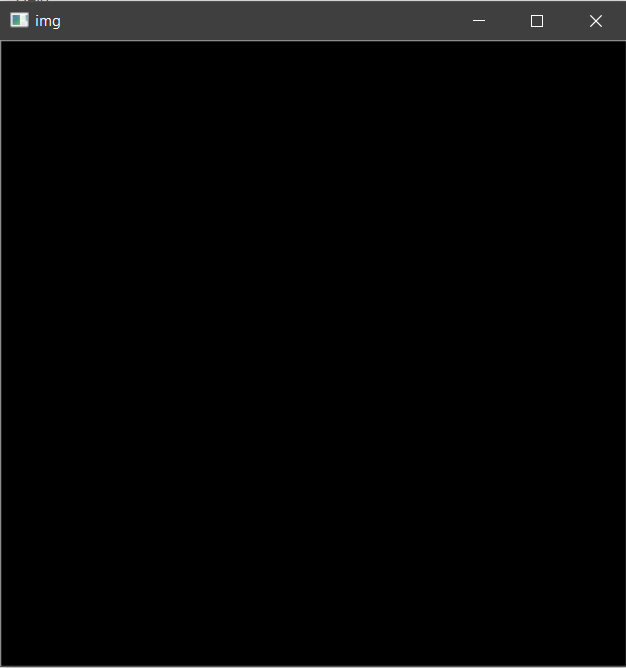

**Chuyển nó sang màu trắng cho dễ nhìn:**

In [4]:
# Chỉnh sửa ma trận mô hình:
for i in range(rows):
    for j in range(cols):
        shw[i][j] = (255, 255, 255)
shw

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [5]:
# In ra hình ảnh dựa vào mô hình trên:
cv2.imshow("img", shw)
cv2.waitKey(0)

# Ta được khung hình vuông màu trắng, có tên "img":

-1

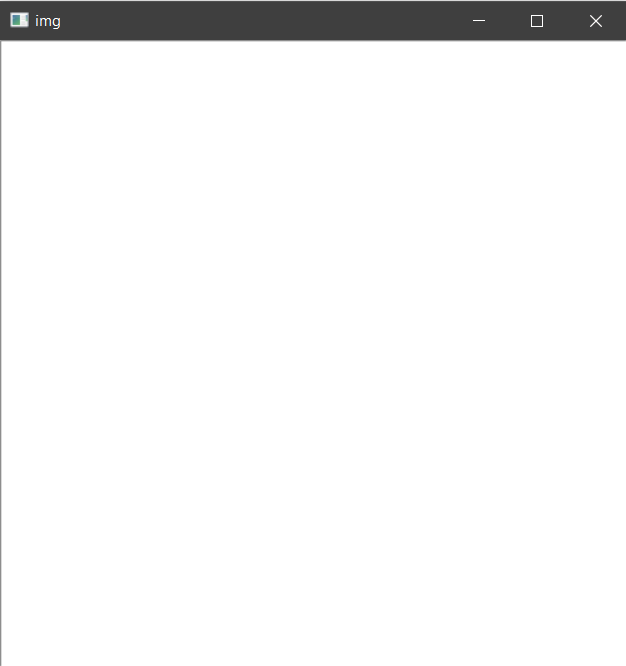

### Tạo hình tròn bên trong khung hình vuông trên:

Trước tiên ta thấy hình tròn trong phần khai báo khá nhỏ có R = 3, và hinhd vuông tương ứng cũng nhỏ d = 20, khung hình vuông tạo bên trên đã lớn hơn với d = 500, vì vậy ta cũng phải chuyển tọa độ và độ lớn hình tròn lên tương ứng với khung hình vuông hiện tại. **Vì vậy ta tạo hàm chuyển:**

**Xây dựng 1 phép ánh xạ tọa độ:**

In [6]:
def transform(x, y, tl1x, tl1y, d1, tl2x, tl2y, d2):
    x2= ((x - tl1x) / d1) * d2 + tl2x
    y2= ((y - tl1y) / d1) * d2 + tl2y
    return int(x2), int(y2)

# x2, y2 là tọa độ tâm hình tròn sau, tương ứng với khung hình vuông hiện tại

**Bắt tay vào vẽ hình tròn:**

In [7]:
cx, cy = transform(x, y, -d/2, -d/2, d, 0, 0, d2)
print(cx, cy) # Tọa độ sau khi chuyển:

375 175


In [8]:
# Chuyển bán kình:
R1 = int(R/d*d2)
R1

75

In [9]:
# Vẽ hình tròn sau khi chuyển, ma trận mô hình:
cv2.circle(shw, (cx, cy), R1, (0, 0, 0))

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [10]:
# Hiển thị hình tròn dựa trên mô hình:
cv2.imshow("img", shw)
cv2.waitKey(0)

-1

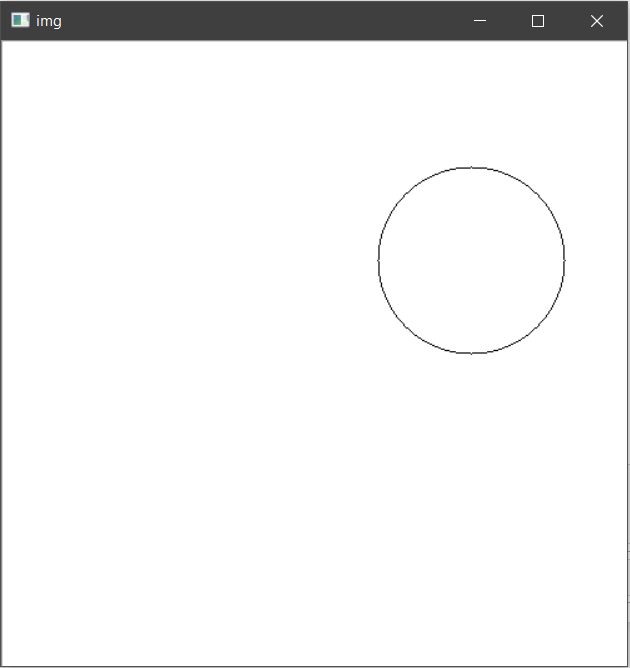

### Bắt đầu sinh điểm để đánh giá:

In [11]:
for i in range(tries):
    # sinh các tung độ và hoành độ của điểm một cách ngẫu nhiên
    rand_x = random.uniform(-lmt, lmt) 
    rand_y = random.uniform(-lmt, lmt) 

    # Điểm cũng cần phải chuyển tương ứng với ảnh mới:
    x2, y2 = transform(rand_x, rand_y, -d/2, -d/2, d, 0, 0, d2)

    # kiểm tra điểm có nằm trong hình tròn không:
    if (math.sqrt((rand_x - x)**2 + (rand_y - y)**2) <= R):
        cv2.circle(shw, (x2, y2), 2, (255, 0, 0), -1) # sinh ra những hình tròn kích thước rất nhỏ (coi là điểm) tương ứng với
        #vị trí trong khung "shw" 
        inside += 1
    else:
        cv2.circle(shw, (x2, y2), 2, (0, 255, 0), -1) # Sinh điểm trong khung "shw" tương tự
    
    # Sinh đến đâu hiển thị trên ảnh đến đấy
    cv2.imshow("img", shw)
    cv2.waitKey(100)

### Tính pi theo công thức như bình thường:

In [12]:
pi = (d**2 * inside / tries) / (R**2)
pi

3.1708